# Zero Noise Extrapolation for photonic quantum circuits

1. [Beam Splitters as rotations](#BS_rotations)
    1. [Rotations to compute the identity operator](#rotation_identity)
2. [Simulations](#simulations)
    1. [Noiseless simulation](#perfect_simulation)
    2. [Noisy simulation](#noisy_simulation)
3. [Zero Noise Extrapolation (ZNE)](#ZNE) 
    1. [ZNE with 2 Rx](#ZNE_2_rx) 
    2. [ZNE with 2 Rx and 2 Ry](#ZNE_2_rx_ry) 
4. [Conclusions and future work](#conclusions) 

In [1]:
import perceval as pcvl
import sympy as sp
import numpy as np
from perceval.components import BS, PS
import random
import matplotlib.pyplot as plt

# 1. Beam Splitters as rotations <a name="BS_rotations"></a>

Beam splitters are optical devices that couple two spatial modes together, acting on |0,1> and |1,0> . Three specialized conventions are defined (Rx, Ry and H) [1], with a single parameter ($\theta = \pi/2$), as follows:

In [2]:
bs_rx = BS.Rx()
bs_ry = BS.Ry()
bs_h = BS.H()

A Beam-Splitter in Rx convention for theta pi/2:


Visual representation of the sam Beam-Splitter:


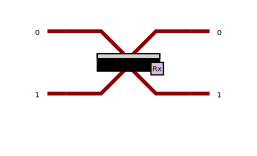

In [43]:
print("A Beam-Splitter in Rx convention for theta pi/2:")
pcvl.pdisplay(bs_rx.compute_unitary())# Matrix representation of the beam splitter with the rotation x (Rx) convention 
print("Visual representation of the same Beam-Splitter:")
pcvl.pdisplay(bs_rx) # Visual representation in circuit of Rx  

If we change the angle to $\theta = \pi$, we have an X operator with a global phase $i$.

In [44]:
bs_rx_2 = BS.Rx(theta=np.pi)
print("A Beam-Splitter in Rx convention for theta pi:")
pcvl.pdisplay(bs_rx_2.compute_unitary())

A Beam-Splitter in Rx convention for theta pi:


A Beam-Splitter in Ry convention for theta pi/2:


Visual representation of the same Beam-Splitter:


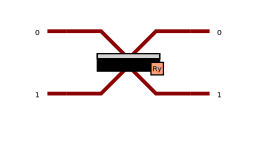

In [45]:
print("A Beam-Splitter in Ry convention for theta pi/2:")
pcvl.pdisplay(bs_ry.compute_unitary())# Matrix representation of the beam splitter with the rotation y (Ry) convention 
print("Visual representation of the same Beam-Splitter:")
pcvl.pdisplay(bs_ry) # Visual representation in circuit of Ry  

In [46]:
bs_ry_2 = BS.Ry(theta=np.pi)
print("A Beam-Splitter in Ry convention for theta pi:")
pcvl.pdisplay(bs_ry_2.compute_unitary())

A Beam-Splitter in Ry convention for theta pi:


## 1.1 Rotations to compute the identity operator <a name="rotation_identity"></a>

Using the Beam-Splitter we can compute the identiy operator. If we use two BS in Rx convention each with $\theta = \pi$, we obtain the identity operator with a global phase $-1$

Two Beam-Splitter in the Rx convention with theta pi gives an identiy operator with a global phase:


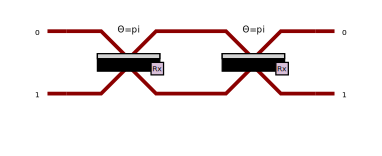

In [48]:
identity_with_phase = (pcvl.Circuit(2, name="identity")
           .add(0, bs_rx_2)
           .add(0, bs_rx_2))

print("Two Beam-Splitter in the Rx convention with theta pi gives an identiy operator with a global phase:")
pcvl.pdisplay(identity_with_phase.compute_unitary())
pcvl.pdisplay(identity_with_phase)

If we repeat Rx with $\theta = \pi$ four times, we obtain the identity operator without the globla phase

Four Beam-Splitter in the Rx convention with theta pi gives an identiy operator:


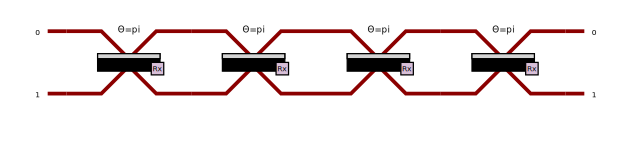

In [50]:
identity = (pcvl.Circuit(2, name="identity")
           .add(0, bs_rx_2)
           .add(0, bs_rx_2)
           .add(0, bs_rx_2)
           .add(0, bs_rx_2))

print("Four Beam-Splitter in the Rx convention with theta pi gives an identiy operator:")
pcvl.pdisplay(identity.compute_unitary())
pcvl.pdisplay(identity)

# 2. Simulations <a id="simulations"></a>

## 2.1 Noiseless simulation <a id="perfect_simulation"></a>

In [54]:
source = pcvl.Source()

In [55]:
p = pcvl.Processor("SLOS", identity_with_phase , source)

In [56]:
p.with_input(pcvl.BasicState([1, 0]))

In the simulation we obtain the same state as the initial input given that the circuit representes the indentity operator

In [57]:
output_distribution = p.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|1,0>",1


## 2.2 Noisy simulation <a name="noisy_simulation"></a>

We can add a random noise in the form of an error in the angle of the BS: 
    $$ \theta_{noisy} = \theta - X $$
    

where $X \sim \mathcal{U}(a, b)$ in the range $0.001 \leq   X \leq \pi/20 $ and $\theta = \pi$
 


In [31]:
noise_angle_x = random.uniform(0.001, np.pi/20)
bs_noisy_rx = BS.Rx(theta= np.pi - noise_angle_x)

Effects of the noise in the Beam-Splitter in the Rx convention:


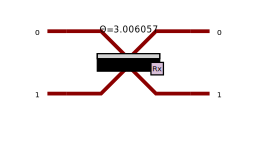

In [51]:
print("Effects of the noise in the Beam-Splitter in the Rx convention:")
pcvl.pdisplay(bs_noisy_rx.compute_unitary())
pcvl.pdisplay(bs_noisy_rx)

In [129]:
p = pcvl.Processor("SLOS", bs_noisy_rx, source)

In the simulation we obtain the same state as the initial input and the flip state with low proability given the noise in the circuit

In [130]:
p.with_input(pcvl.BasicState([1, 0]))
output_distribution = p.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|0,1>",0.995415
"|1,0>",0.004585


Effects of the noise in the Identity operator using two Beam-Splitter in the Rx convention:


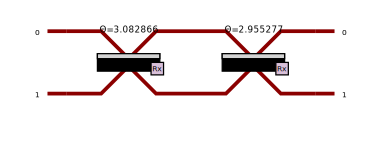

In [121]:
noise_angle_x_1 = random.uniform(0.01, np.pi/10)
noise_angle_x_2 = random.uniform(0.01, np.pi/10)

identity_nosiy_2 = (pcvl.Circuit(2, name="identity")
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_1))
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_2)))

print("Effects of the noise in the Identity operator using two Beam-Splitter in the Rx convention:")
pcvl.pdisplay(identity_nosiy_2 .compute_unitary())
pcvl.pdisplay(identity_nosiy_2)

Effects of the noise in the Identity operator using four Beam-Splitter in the Rx convention:


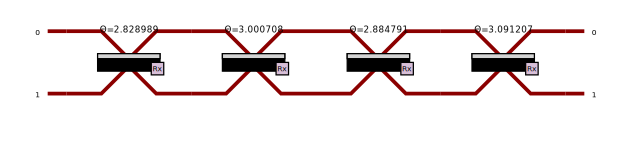

In [133]:
noise_angle_x_1 = random.uniform(0.01, np.pi/10)
noise_angle_x_2 = random.uniform(0.01, np.pi/10)
noise_angle_x_3 = random.uniform(0.01, np.pi/10)
noise_angle_x_4 = random.uniform(0.01, np.pi/10)

identity_nosiy_4 = (pcvl.Circuit(2, name="identity")
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_1))
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_2))
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_3))
           .add(0, BS.Rx(theta= np.pi - noise_angle_x_4)))

print("Effects of the noise in the Identity operator using four Beam-Splitter in the Rx convention:")
pcvl.pdisplay(identity_nosiy_4.compute_unitary())
pcvl.pdisplay(identity_nosiy_4)

In [134]:
p = pcvl.Processor("SLOS",identity_nosiy_4 , source)
p.with_input(pcvl.BasicState([1, 0]))

Increasing the number of BS will increase the noise, increasing the probability of obtaining the wrong state

In [135]:
output_distribution = p.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|1,0>",0.862185
"|0,1>",0.137815


# 3. Zero Noise Extrapolation <a name="ZNE"></a>

In the Zero-noise extrapolation (ZNE) technique a quantum circuit is modified to run at different noise scales [2]. The result is extrapolated to an estimated value at noiseless level. There are multiple ways of scaling the noise in this work we use unitary folding, replacing a unitary circuit $U$ by:

$$ U \rightarrow U(U^\dagger U )^n $$



The first circuit we are going to use is the following:

## 3.1 ZNE with 2 Rx <a name="ZNE_2_rx"></a>

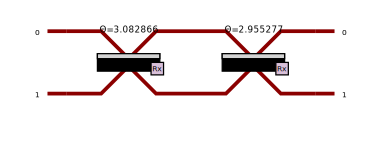

In [123]:
pcvl.pdisplay(identity_nosiy_2)

In [124]:
results = []
noise_scaling = []

source = pcvl.Source(emission_probability=0.70, multiphoton_component=0.04, losses=0.3)

source = pcvl.Source()

scaling = 0


for x in range(1, 9, 2):
    scaling+=1
    noise_scaling.append(scaling)
    print("Noise Scaling:", scaling)

    circuit_id_noise = pcvl.Circuit(2)

    for i in range(x):
        noise_angle_x_1 = random.uniform(0.001, np.pi/20)
        noise_angle_x_2 = random.uniform(0.001, np.pi/20)

        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi - noise_angle_x_1 ))
        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi - noise_angle_x_2 ))

         
    p = pcvl.Processor("SLOS", circuit_id_noise, source)

    p.with_input(pcvl.BasicState([1, 0]))

    output_distribution = p.probs()["results"]
    pcvl.pdisplay(output_distribution, max_v=10)

    for output_bs, prob in output_distribution.items():
        output_state = output_bs
        if (output_state[0] == 1 and output_state[1] == 0):
            results.append(prob)

Noise Scaling: 1


state,probability
"|1,0>",0.990152
"|0,1>",0.009848


Noise Scaling: 2


state,probability
"|1,0>",0.933947
"|0,1>",0.066053


Noise Scaling: 3


state,probability
"|1,0>",0.802394
"|0,1>",0.197606


Noise Scaling: 4


state,probability
"|1,0>",0.713414
"|0,1>",0.286586


In [125]:
polynomial_1 = np.polyfit(noise_scaling,results,deg=1)
polynomial_2 = np.polyfit(noise_scaling,results,deg=2)
polynomial_3 = np.polyfit(noise_scaling,results,deg=3)

x_new = np.array([0])
y_1 = np.polyval(polynomial_1,x_new)
y_2 = np.polyval(polynomial_2,x_new)
y_3 = np.polyval(polynomial_3,x_new)

print("Result without ZNE:",results[0])
print("Correct result:", 1)
print("----------------------------------")
print("Results of the extrapolations")
print("Linear extrapolation:", y_1 )
print("Polinomial extrapolation order: 2 ", y_2 )
print("Polinomial extrapolation order 3:", y_3)


Result without ZNE: 0.9901521478598708
Correct result: 1
----------------------------------
Results of the extrapolations
Linear extrapolation: [1.10041848]
Polinomial extrapolation order: 2  [1.05945064]
Polinomial extrapolation order 3: [0.85308875]


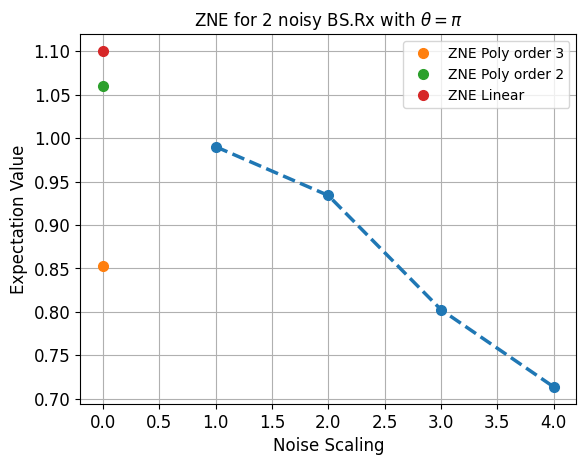

In [126]:
plt.plot(noise_scaling,results, "o--", linewidth=2.5, markersize=7)
plt.plot(0,y_3, "o", markersize=7, label = "ZNE Poly order 3")
plt.plot(0,y_2, "o", markersize=7, label = "ZNE Poly order 2")
plt.plot(0,y_1, "o", markersize=7, label = "ZNE Linear")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(r"ZNE for 2 noisy BS.Rx with $ \theta = \pi$")
plt.xlabel('Noise Scaling', size= 12)
plt.ylabel('Expectation Value', size=12)
plt.legend()
plt.grid()
plt.show()

## 3.1 ZNE with 2 Rx and 2 Ry <a name="ZNE_2_rx_ry"></a>

The second circuit we are going to use is the following:

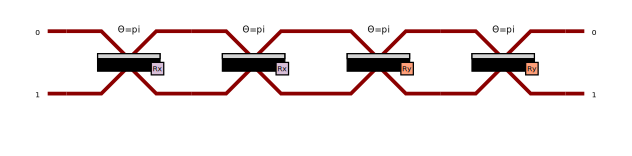

In [128]:
rx_ry = (pcvl.Circuit(2)
           .add(0, BS.Rx(theta= np.pi ))
           .add(0, BS.Rx(theta= np.pi ))
           .add(0, BS.Ry(theta= np.pi ))
           .add(0, BS.Ry(theta= np.pi )))

pcvl.pdisplay(rx_ry.compute_unitary())
pcvl.pdisplay(rx_ry)

Result without ZNE: 0.9836450436067884
Correct result: 1
----------------------------------
Results of the extrapolations
Linear extrapolation: [1.13543888]
Polinomial extrapolation order: 2  [1.05150126]
Polinomial extrapolation order 3: [1.23913733]


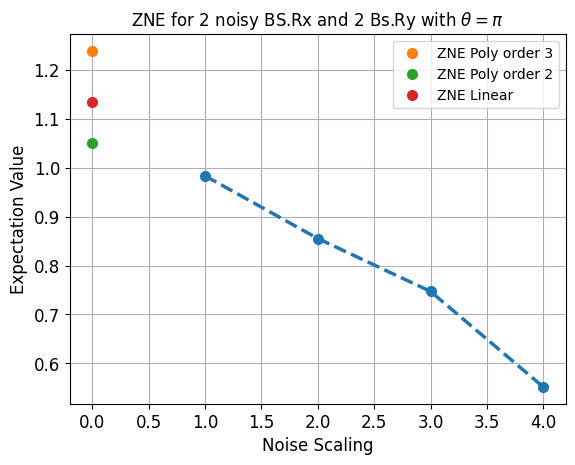

In [117]:
results = []
noise_scaling = []

source = pcvl.Source(emission_probability=0.70, multiphoton_component=0.04, losses=0.3)

source = pcvl.Source()

scaling = 0


for x in range(1, 9, 2):
    scaling+=1
    noise_scaling.append(scaling)
    #print("Noise Scaling:", scaling)

    circuit_id_noise = pcvl.Circuit(2)

    for i in range(x):
        noise_angle_x_1 = random.uniform(0.001, np.pi/20)
        noise_angle_x_2 = random.uniform(0.001, np.pi/20)
        noise_angle_x_3 = random.uniform(0.001, np.pi/20)
        noise_angle_x_4 = random.uniform(0.001, np.pi/20)

        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi - noise_angle_x_1 ))
        circuit_id_noise.add((0, 1), BS.Rx(theta= np.pi - noise_angle_x_2 ))
        circuit_id_noise.add((0, 1), BS.Ry(theta= np.pi - noise_angle_x_3 ))
        circuit_id_noise.add((0, 1), BS.Ry(theta= np.pi - noise_angle_x_4 ))
         
    p = pcvl.Processor("SLOS", circuit_id_noise, source)

    p.with_input(pcvl.BasicState([1, 0]))

    output_distribution = p.probs()["results"]
    #pcvl.pdisplay(output_distribution, max_v=10)

    for output_bs, prob in output_distribution.items():
        output_state = output_bs
        if (output_state[0] == 1 and output_state[1] == 0):
            results.append(prob)
            
polynomial_1 = np.polyfit(noise_scaling,results,deg=1)
polynomial_2 = np.polyfit(noise_scaling,results,deg=2)
polynomial_3 = np.polyfit(noise_scaling,results,deg=3)

x_new = np.array([0])
y_1 = np.polyval(polynomial_1,x_new)
y_2 = np.polyval(polynomial_2,x_new)
y_3 = np.polyval(polynomial_3,x_new)

print("Result without ZNE:",results[0])
print("Correct result:", 1)
print("----------------------------------")
print("Results of the extrapolations")
print("Linear extrapolation:", y_1 )
print("Polinomial extrapolation order: 2 ", y_2 )
print("Polinomial extrapolation order 3:", y_3)

plt.plot(noise_scaling,results, "o--", linewidth=2.5, markersize=7)
plt.plot(0,y_3, "o", markersize=7, label = "ZNE Poly order 3")
plt.plot(0,y_2, "o", markersize=7, label = "ZNE Poly order 2")
plt.plot(0,y_1, "o", markersize=7, label = "ZNE Linear")
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(r"ZNE for 2 noisy BS.Rx and 2 Bs.Ry with $ \theta = \pi$")
plt.xlabel('Noise Scaling', size= 12)
plt.ylabel('Expectation Value', size=12)
plt.legend()
plt.grid()
plt.show()


# 4. Conclusions and future work



## References

[1] https://perceval.quandela.net/docs/index.html 

[2] https://arxiv.org/abs/2005.10921 
